In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('./data/xqc_chat.csv', parse_dates=True, index_col='Message_Datetime')

data.columns = [col.lower() for col in data.columns]

data.head(2)

,name,moderator,vip,subscriber,is_first_message,message_len,qtd_msgs_15_secs,message,banned
Message_Datetime,,,,,,,,,
2021-08-30 02:21:29,xenobtx,0,0,0,0,9,1.0,OkayChamp,0
2021-08-30 02:21:29,joof420,0,0,0,0,10,1.0,gachiHYPER,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 703089 entries, 2021-08-30 02:21:29 to 2021-09-08 20:18:00
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              703089 non-null  object 
 1   moderator         703089 non-null  int64  
 2   vip               703089 non-null  int64  
 3   subscriber        703089 non-null  int64  
 4   is_first_message  703089 non-null  int64  
 5   message_len       703089 non-null  int64  
 6   qtd_msgs_15_secs  703089 non-null  float64
 7   message           702987 non-null  object 
 8   banned            703089 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 53.6+ MB


In [61]:
data.isna().sum()

name                  0
moderator             0
vip                   0
subscriber            0
is_first_message      0
message_len           0
qtd_msgs_15_secs      0
message             102
banned                0
dtype: int64

In [110]:
data.banned.value_counts()[1]

6770

In [50]:
data.banned.value_counts(normalize=True)

0    0.990371
1    0.009629
Name: banned, dtype: float64

In [51]:
# number of unique chatters
data.name.unique().shape

(59845,)

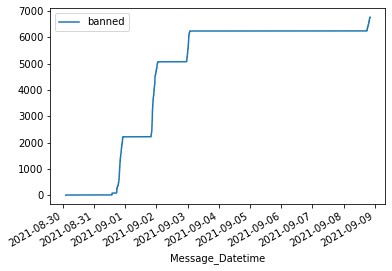

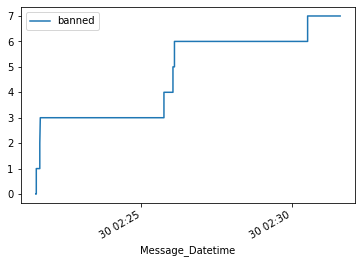

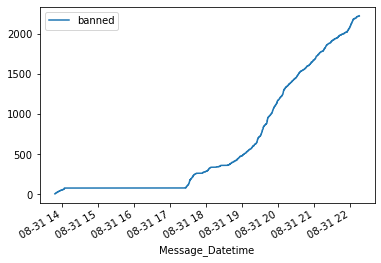

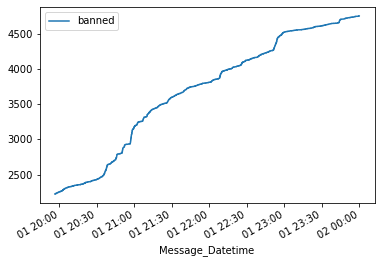

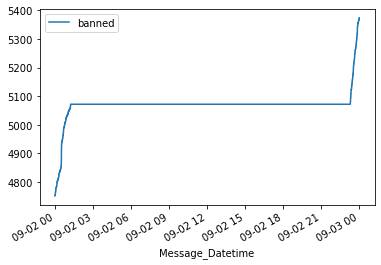

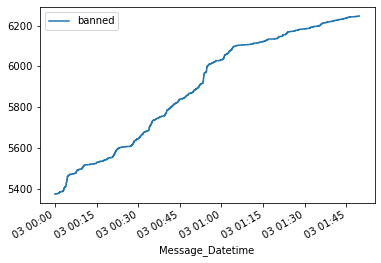

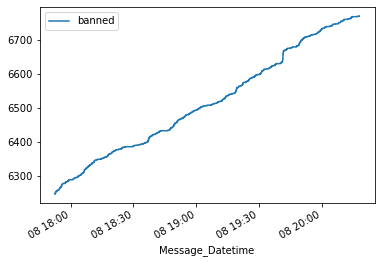

In [170]:
banned_cumsum = pd.DataFrame(data['banned'].cumsum())

# plot bans over time overall
banned_cumsum.plot()

# zoom in on 'streams'

banned_cumsum.loc['2021-08-30'].plot() #

banned_cumsum.loc['2021-08-31'].plot()

banned_cumsum.loc['2021-09-01'].plot()

banned_cumsum.loc['2021-09-02'].plot() #

banned_cumsum.loc['2021-09-03'].plot()

banned_cumsum.loc['2021-09-08'].plot();

In [165]:
last_message = data.groupby('name')[data.columns].last()
print(f' Expected: {data.banned.value_counts()[1]}, Actual: {last_message.banned.sum()}')
print(f' Expected: {data.name.unique().shape[0]}, Actual: {len(last_message)}')

# people are getting banned multiple times, perhaps these are 'message got removed'
# last message isnt necessarily the ban message

 Expected: 6770, Actual: 1285
 Expected: 59845, Actual: 59845


In [6]:
temp = data.groupby('name')['banned'].sum()

In [7]:
temp.sort_values(ascending=False)[:10]

name
nick__hbb                  27
forgettrance               24
69haggushippo              22
shriaknt                   19
higmaxx                    18
FredFauIk                  17
croudzeroo                 16
QUOTE_IF_VOYBOY_ON_RYZE    16
1mari0                     16
nukeondatface3             16
Name: banned, dtype: int64

In [4]:
data[data['name'] == 'nick__hbb']

,name,moderator,vip,subscriber,is_first_message,message_len,qtd_msgs_15_secs,message,banned
Message_Datetime,,,,,,,,,
2021-09-01 21:11:43,nick__hbb,0,0,1,0,125,1.0,CSGO SURFING POGGERS CSGO SURFING POGGERS CSGO...,0
2021-09-01 21:11:49,nick__hbb,0,0,1,0,146,1.0,CSGO SURFING POGGERS CSGO SURFING POGGERS CSGO...,0
2021-09-01 21:11:55,nick__hbb,0,0,1,0,167,2.0,CSGO SURFING POGGERS CSGO SURFING POGGERS CSGO...,0
2021-09-01 21:12:05,nick__hbb,0,0,1,0,125,2.0,CSGO SURFING POGGERS CSGO SURFING POGGERS CSGO...,0
2021-09-01 21:12:30,nick__hbb,0,0,1,0,272,1.0,CSGO SURFING POGGERS CSGO SURFING POGGERS CSGO...,0
...,...,...,...,...,...,...,...,...,...
2021-09-03 00:21:20,nick__hbb,0,0,1,0,359,1.0,@xQcOW pog https://youtu.be/0ug2DOoxJ1g @xQcOW...,1
2021-09-03 00:34:46,nick__hbb,0,0,1,0,13,1.0,@xQcOW pog ht,1
2021-09-03 00:35:06,nick__hbb,0,0,1,0,39,1.0,@xQcOW pog https://youtu.be/0ug2DOoxJ1g,1


In [146]:
data.describe()

,moderator,vip,subscriber,is_first_message,message_len,qtd_msgs_15_secs,banned
count,703089.000000,703089.000000,703089.000000,703089.0,703089.000000,703089.000000,703089.000000
mean,0.011603,0.009689,0.512222,0.0,25.724166,1.292411,0.009629
std,0.107091,0.097953,0.499851,0.0,47.250536,0.758085,0.097654
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,7.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.0,11.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.0,20.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,3876.000000,31.000000,1.000000


is_first_message has no useful info

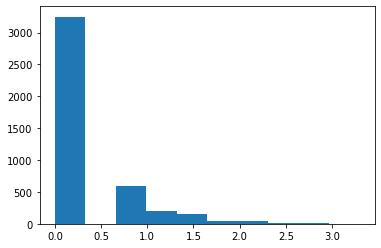

In [163]:
temp = pd.DataFrame(temp)
plt.hist(np.log(temp[temp['banned'] > 0]));

In [166]:
len(temp[temp['banned'] > 0])

4312

In [167]:
# most people who get banned only get banned once
temp[temp['banned'] == 1].sum()

banned    3248
dtype: int64